# Parcial 1
Integrantes


*   Yuliana Duarte Quintero
*  Dilia Maria Luna Melo



Ejercicio I (35%)
El color de las hojas de una planta puede proporcionar información valiosa sobre su salud, por
ejemplo:
1. Color verde: Por lo general, las hojas sanas tienen un color verde vibrante. Este color
verde procede de la clorofila, el pigmento responsable de la fotosíntesis.
2. Hojas amarillentas: Las hojas amarillentas pueden indicar varios problemas. Puede ser
un signo de deficiencia de nutrientes, en particular de nitrógeno. El nitrógeno es esencial
para la producción de clorofila, por lo que su carencia puede hacer que las hojas se
vuelvan amarillas.
3. Hojas marrones o secas: Las hojas marrones o secas suelen indicar deshidratación o
estrés hídrico. La falta de agua, las altas temperaturas, la baja humedad o la exposición
excesiva a la luz solar pueden hacer que las hojas se sequen y se vuelvan marrones.
Se debe desarrollar un programa que clasifique imágenes de hojas de árbol de mango en dos
categorías: saludables y enfermas usando las herramientas


Ayudas:
- Definir una función que toma una imagen y retorna su clase
- Analizar el histograma de colores de las imágenes e identificar que propiedad puede ser
usada para distinguir cada una de las clases
Ejemplo de hoja enferma Ejemplo de hoja saludable
- Hacer un ciclo por cada una de las carpetas y contar el número correcto que su función
de predicción logró

In [54]:
# Importacion de librerias
from google.colab import drive
import shutil
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from PIL import Image
from skimage import exposure, filters

In [55]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#Se abre la data de las dos carpetas
data_sana = '/content/drive/MyDrive/Parcial I/Healthy'
data_enferma = '/content/drive/MyDrive/Parcial I/Die Back'

Imágenes de la base de datos sana:


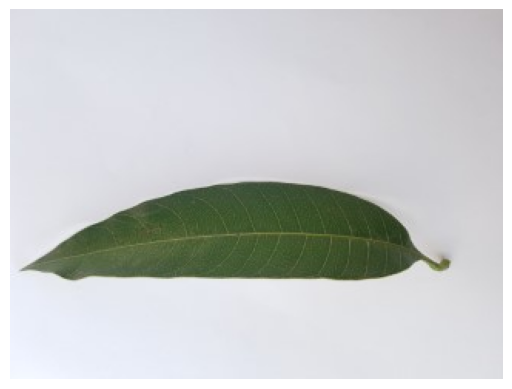

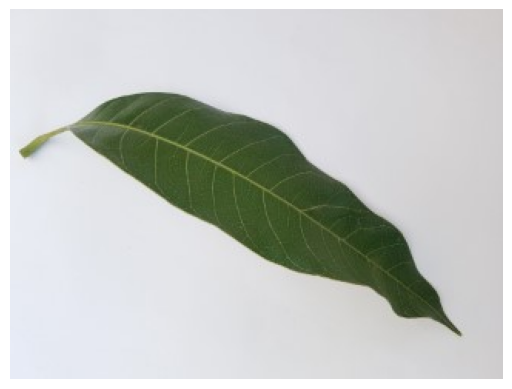

Imágenes de la base de datos enferma:


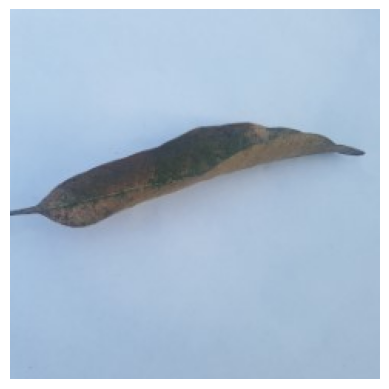

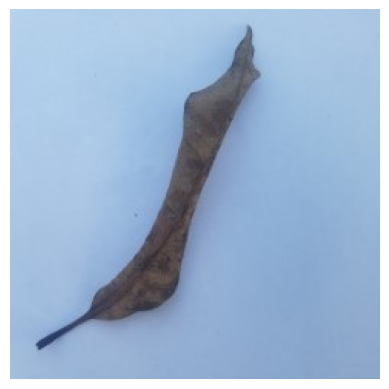

In [57]:
# se muestran algunas imagenes por medio de una funcion de la base de datos
def mostrar_imagenes(ruta, num_imagenes = 2):
    # Obtener una lista de archivos de la carpeta
    archivos = os.listdir(ruta)
    # Seleccionar num_imagenes al azar (o menos si hay menos archivos)
    seleccion = archivos[:min(num_imagenes, len(archivos))]
    # Mostrar las imágenes seleccionadas
    for imagen in seleccion:
        img = mpimg.imread(os.path.join(ruta, imagen))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Mostrar algunas imágenes de la base de datos sana
print("Imágenes de la base de datos sana:")
mostrar_imagenes(data_sana)

# Mostrar algunas imágenes de la base de datos enferma
print("Imágenes de la base de datos enferma:")
mostrar_imagenes(data_enferma)

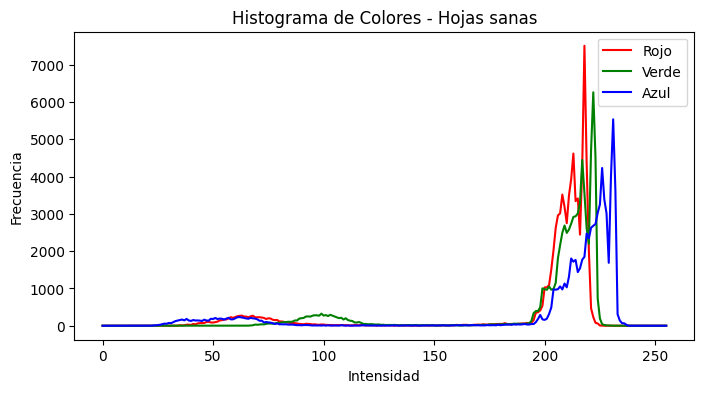

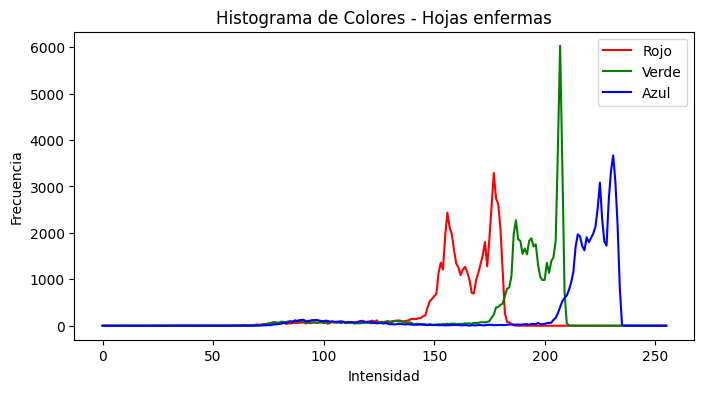

In [58]:
# Cargar las imágenes
imagen_sana = cv2.imread('/content/drive/MyDrive/Parcial I/Healthy/20211231_123105.jpg') #sana
imagen_enfermas = cv2.imread('/content/drive/MyDrive/Parcial I/Die Back/20211129_160425.jpg') #enferma

# Convertir las imágenes de BGR a RGB
imagen_sana_rgb = cv2.cvtColor(imagen_sana, cv2.COLOR_BGR2RGB)
imagen_enfermas_rgb = cv2.cvtColor(imagen_enfermas, cv2.COLOR_BGR2RGB)

# Calcular los histogramas de cada canal de color para cada imagen
hist_sana_r = cv2.calcHist([imagen_sana_rgb], [0], None, [256], [0, 256])
hist_sana_g = cv2.calcHist([imagen_sana_rgb], [1], None, [256], [0, 256])
hist_sana_b = cv2.calcHist([imagen_sana_rgb], [2], None, [256], [0, 256])

hist_enfermas_r = cv2.calcHist([imagen_enfermas_rgb], [0], None, [256], [0, 256])
hist_enfermas_g = cv2.calcHist([imagen_enfermas_rgb], [1], None, [256], [0, 256])
hist_enfermas_b = cv2.calcHist([imagen_enfermas_rgb], [2], None, [256], [0, 256])

# Mostrar una sola gráfica con los histogramas de los tres canales de color para cada clase
plt.figure(figsize=(8, 4))

plt.plot(hist_sana_r, color='red', label='Rojo')
plt.plot(hist_sana_g, color='green', label='Verde')
plt.plot(hist_sana_b, color='blue', label='Azul')
plt.title('Histograma de Colores - Hojas sanas')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.legend()

plt.figure(figsize=(8, 4))

plt.plot(hist_enfermas_r, color='red', label='Rojo')
plt.plot(hist_enfermas_g, color='green', label='Verde')
plt.plot(hist_enfermas_b, color='blue', label='Azul')
plt.title('Histograma de Colores - Hojas enfermas')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

De acuerdo con las graficas anteriores, se define que el color Rojo es el color el cual se usara para clasificar las imaganes, para saber cuales estan enferms y cuales estan sanas


In [60]:
# Función para cargar y procesar las imágenes de una carpeta
def cargar_imagenes(ruta):
    imagenes = []
    for filename in os.listdir(ruta):
        img = cv2.imread(os.path.join(ruta, filename))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imagenes.append(img_rgb)
    return imagenes

# Cargar las imágenes de las dos clases
data_sana = '/content/drive/MyDrive/Parcial I/Healthy'
data_enferma = '/content/drive/MyDrive/Parcial I/Die Back'

imagenes_sana = cargar_imagenes(data_sana)
imagenes_enferma = cargar_imagenes(data_enferma)

# Función para calcular la distancia euclidiana entre dos imágenes
def distancia_euclidiana(img1, img2):
    if img1.shape != img2.shape:
        # Redimensionar la imagen más pequeña para que tenga las mismas dimensiones que la imagen más grande
        min_height = min(img1.shape[0], img2.shape[0])
        min_width = min(img1.shape[1], img2.shape[1])
        img1 = cv2.resize(img1, (min_width, min_height))
        img2 = cv2.resize(img2, (min_width, min_height))
    return np.sqrt(np.sum((img1 - img2) ** 2))

# Función para clasificar una imagen en las dos clases
def clasificar_imagen(imagen, imagenes_sana, imagenes_enferma):
    distancia_sana = np.mean([distancia_euclidiana(imagen, img) for img in imagenes_sana])
    distancia_enferma = np.mean([distancia_euclidiana(imagen, img) for img in imagenes_enferma])
    return 1 if distancia_sana < distancia_enferma else 2

# Clasificar todas las imágenes en las carpetas
clasificaciones = []
for imagen in imagenes_sana:
    clase = clasificar_imagen(imagen, imagenes_sana, imagenes_enferma)
    clasificaciones.append(clase)
for imagen in imagenes_enferma:
    clase = clasificar_imagen(imagen, imagenes_sana, imagenes_enferma)
    clasificaciones.append(clase)

In [66]:
# Contar el número de imágenes clasificadas como sanas y enfermas
total_sanas = clasificaciones.count(1)
total_enfermas = clasificaciones.count(2)

# Mostrar la cantidad de imágenes clasificadas para cada clase
print("Total de imágenes clasificadas como sanas:", total_sanas)
print("Total de imágenes clasificadas como enfermas:", total_enfermas)

# Calcular el porcentaje de imágenes clasificadas correctamente para cada clase
porcentaje_sanas = (total_sanas / len(clasificaciones)) * 100
porcentaje_enfermas = (total_enfermas / len(clasificaciones)) * 100

# Mostrar el porcentaje de imágenes clasificadas correctamente para cada clase
print("Porcentaje de imágenes clasificadas como sanas: {:.2f}%".format(porcentaje_sanas))
print("Porcentaje de imágenes clasificadas como enfermas: {:.2f}%".format(porcentaje_enfermas))


Total de imágenes clasificadas como sanas: 100
Total de imágenes clasificadas como enfermas: 160
Porcentaje de imágenes clasificadas como sanas: 38.46%
Porcentaje de imágenes clasificadas como enfermas: 61.54%


Ejercicio II (65%)
Como parte del flujo de un programa para el análisis de células se necesita pre-procesar las
imágenes para facilitar su estudio. Se debe crear una rutina de procesamiento de imágenes en
la que se tome una imagen de células (A en Figura) y se produzcan las siguientes imágenes:
1. Imagen binaria [0,255] en donde los blancos determinen la parte de la imagen que son
células y el negro la parte de fondo (B en Figura)
2. Bordes de las células (C en Figura)

Text(0.5, 1.0, 'Imagen Original')

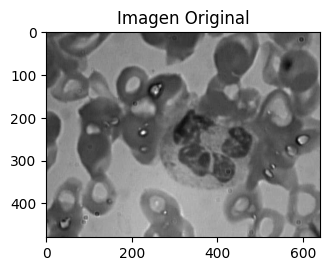

In [71]:
# Paso 1: Cargar la imagen
imagen = Image.open('/content/drive/MyDrive/Parcial I/bloodImage.jpg').convert('L')  # Convertir a escala de grises


plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')


Text(0.5, 1.0, 'Imagen Equalizada')

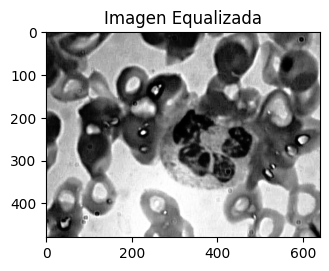

In [72]:
# Paso 2: Equalizar el histograma de intensidad
imagen_equalizada = exposure.equalize_hist(np.array(imagen))

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 2)
plt.imshow(imagen_equalizada, cmap='gray')
plt.title('Imagen Equalizada')


Text(0.5, 1.0, 'Imagen Suavizada')

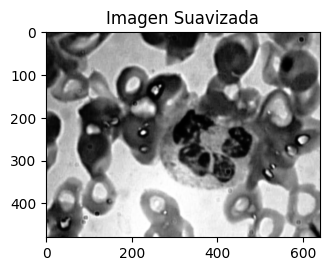

In [73]:
# Paso 3: Suavizar la imagen con un desenfoque Gaussiano (no disponible en PIL)
# Como alternativa, podemos aplicar un filtro de media para suavizar la imagen
imagen_suavizada = filters.gaussian(imagen_equalizada, sigma=1)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 3)
plt.imshow(imagen_suavizada, cmap='gray')
plt.title('Imagen Suavizada')

Text(0.5, 1.0, 'Imagen Binaria')

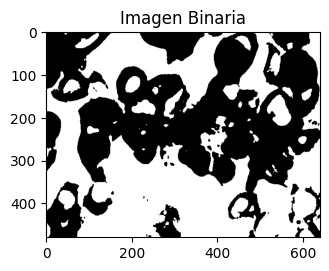

In [74]:
# Paso 4: Crear la imagen binaria
# Podemos utilizar un umbral para convertir la imagen en binaria
umbral = 0.5  # Umbral ajustable según la imagen
imagen_binaria = (imagen_suavizada > umbral).astype(np.uint8) * 255

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 4)
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Binaria')

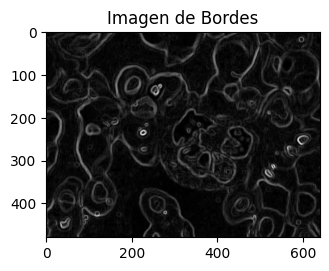

In [75]:
# Paso 5: Crear la imagen de bordes
# Podemos aplicar el operador de Canny para detectar los bordes
imagen_bordes = filters.sobel(imagen_suavizada)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 5)
plt.imshow(imagen_bordes, cmap='gray')
plt.title('Imagen de Bordes')

plt.show()